<a href="https://colab.research.google.com/github/Emeka-Christopher/short-text-classiication/blob/main/getting_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Check in was so slow, no se..."
1,✅ Trip Verified | My review relates to the ap...
2,✅ Trip Verified | This was my first time flyin...
3,✅ Trip Verified | Lots of cancellations and d...
4,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...


In [5]:
#from google.colab import files
#df.to_csv("BA_reviews.csv")
#files.download('BA_reviews.csv')

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
#create a copy of dataframe
data = df.copy()

In [7]:
#Data Cleaning
data.head(20) 

,reviews
0,"✅ Trip Verified | Check in was so slow, no se..."
1,✅ Trip Verified | My review relates to the ap...
2,✅ Trip Verified | This was my first time flyin...
3,✅ Trip Verified | Lots of cancellations and d...
4,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...
5,✅ Trip Verified | Not only my first flight in...
6,✅ Trip Verified | My husband and myself were ...
7,✅ Trip Verified | Organised boarding process. ...
8,✅ Trip Verified | Outward journey BA245 Londo...
9,✅ Trip Verified | Check in agent at LHR was ve...


In [8]:
data.reviews[3000]

'Premium Economy pricey but of questionable value. Having flown BA long-haul twice previously in economy we decided to pay $900 extra round-trip for World Traveller Plus. All we got for the money was legroom. Terrific because I\'m 6\'3" but not worth the price. The trick to airline comfort - and there is no such thing unless you\'re flying business or first class - on a long-haul flight is to book the "4" section of 3-4-3 in economy and hope that the two people beside you and your travel companion are smart enough to figure out that the quickest way to the aisle is to go across one person not two. Let\'s face it all you want from a long-haul flight are comfortable seats (and the new generation of thinner seats receives mixed reviews) and acceptable food. You expect safety and timely arrival which depends on weather and other variables not controlled by the airline.'

In [9]:
#data cleaning

data.replace(re.compile(r'\s*✅ Verified Review \|\s*'), '', inplace=True)
data.replace(re.compile(r'\s*✅ Trip Verified \|\s*'), '', inplace=True)
data.replace(re.compile(r'\s*Not Verified \|\s*'), '', inplace=True)
data.head()

,reviews
0,"Check in was so slow, no self check in and bag..."
1,My review relates to the appalling experiences...
2,This was my first time flying with BA & I was ...
3,Lots of cancellations and delays and no one ap...
4,BA 242 on the 6/2/23. Boarding was delayed due...


In [10]:
data.iloc[100:200]

,reviews
100,Barbara Collins was super helpful. My boyfrien...
101,"My husband, parents who are in their 80’s and ..."
102,On our recommendation my son and his young fam...
103,We had a nice flight. pushed-off exactly on ti...
104,"Holidays ruined, 2 suitcases lost in 2 flights..."
...,...
195,Very poor flight from Cape Town to London. Aft...
196,Our main complaint is that the limited food se...
197,"Complete and utter chaos at Heathrow, yet agai..."
198,"Feb 25, 2022. We show up at the airport 3 hour..."


In [22]:
# Creating a new column called 'SENTIMENT' that contains the sentiment scores of each review using nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import vader
import matplotlib.pyplot as plt
from collections import Counter
nltk.download('stopwords')
from wordcloud import WordCloud

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#create an instance of the sentiment analyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'sent_scores'
data['sent_scores'] = data['reviews'].apply(lambda reviews: sentiment_analyzer.polarity_scores(reviews)['compound'])

data.head()

,reviews,sent_scores
0,"Check in was so slow, no self check in and bag...",0.9173
1,My review relates to the appalling experiences...,-0.7745
2,This was my first time flying with BA & I was ...,0.8856
3,Lots of cancellations and delays and no one ap...,0.1280
4,BA 242 on the 6/2/23. Boarding was delayed due...,0.9564


In [16]:
# Create a new column called sentiment
data['sentiment'] = data['sent_scores'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))
data.head()

,reviews,sent_scores,sentiment
0,"Check in was so slow, no self check in and bag...",0.9173,positive
1,My review relates to the appalling experiences...,-0.7745,negative
2,This was my first time flying with BA & I was ...,0.8856,positive
3,Lots of cancellations and delays and no one ap...,0.1280,positive
4,BA 242 on the 6/2/23. Boarding was delayed due...,0.9564,positive


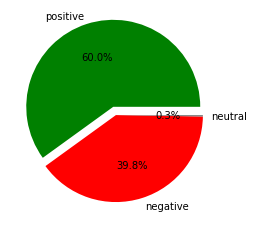

In [17]:
# calculate the percentage of each type of sentiment
sentiment_percentages = data['sentiment'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_percentages,
    labels=sentiment_percentages.index, 
    colors=['green', 'red', 'grey'], 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%'
    )

plt.show()

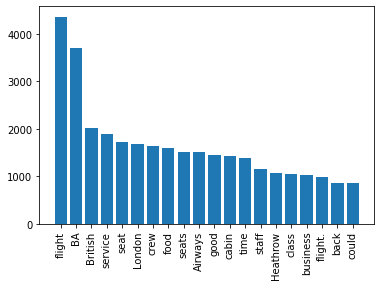

In [21]:
# The frequency chart shows the key topics within the 
# reviews showing what people are actively talking about their experience and staff

# Get the reviews from the dataframe
reviews = data['reviews']

# Convert the reviews to a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Filter out stop words
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get', 'We','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out the stop words 
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

#Display the plot
plt.show()

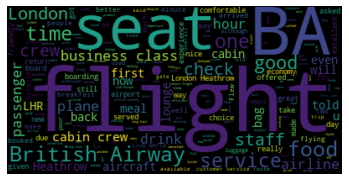

In [24]:
# Create the wordcloud
wordcloud = WordCloud(random_state=42).generate(' '.join(data['reviews']))

# Show the word cloud
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()